Using Bayesian inference for learning synthesis-structure-property relationship via coregionalized piecewise function determination.

Table of Content:
* Libraries to Install
* Import Libraries
* 1D Case:
    * 1D Edge Case Challenges
         * Hermes Demo
         * Visualize results
* N-dimensional Case:
     * 2D Edge Case Challenges
         * Hermes Demo
         * Visualize results

### Libraries to Install

In [1]:
# !pip install tensorrt
# !pip install matplotlib
# !pip install numpy==1.20.1
# !pip install scipy==1.6.2
# !pip install scikit-learn==0.24.1
# !pip install jaxlib
# !pip install jax
# !pip install numpyro==0.10.1
# !pip install GPy==1.10.0
# !pip install torch==1.11.0
# !pip install pyro-ppl==1.5.2
# !pip install gpytorch==1.9.0
# !pip install tensorflow_probability==0.16.0
# !pip install gpflow==2.2.1
# !pip install tqdm==4.59.0
# !pip install optax
# # !pip install gpjax

### Import Libraries

In [1]:
import matplotlib.pyplot as plt

# import numpyro
import numpy as np
# from numpy.random import default_rng

import torch
import dill

# import jax
# import jax.numpy as jnp
from jax import config
config.update("jax_enable_x64", True)

# import pyro.contrib.gp as gp

torch.set_default_dtype(torch.float64)
# from tqdm import trange

# import sys
# adding Folder_2/subfolder to the system path
# sys.path.insert(0, r'C:/Users/gkusne/Documents/GitHub/')
# import hermes
from hermes.joint import SAGE_1D

/Users/camilovelezr/miniforge3/envs/hermes/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:386: UserWarning: <built-in function array> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(
GPFlow is not installed.
GPFlow not installed, GPC classifiers will not be available.


Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


ValueError: Arg specs do not match: original=FullArgSpec(args=['input', 'dtype', 'name', 'layout'], varargs=None, varkw=None, defaults=(None, None, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), new=FullArgSpec(args=['input', 'dtype', 'name'], varargs=None, varkw=None, defaults=(None, None), kwonlyargs=[], kwonlydefaults=None, annotations={}), fn=<function ones_like_v2 at 0x3279a36d0>

## 1-dimensional Cases

### 1D Edge Case Challenges.

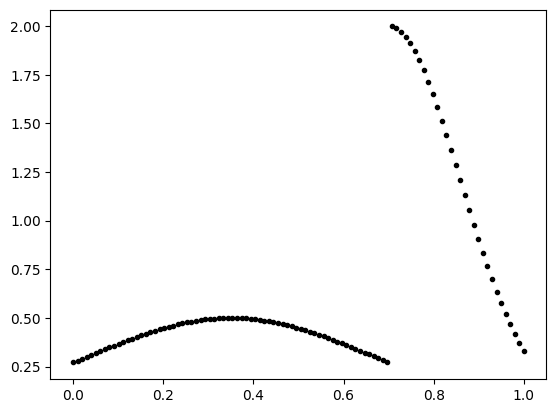

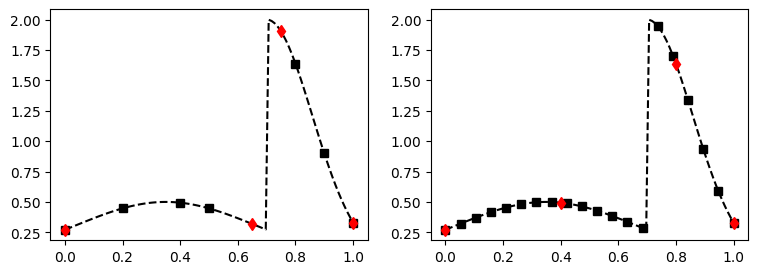

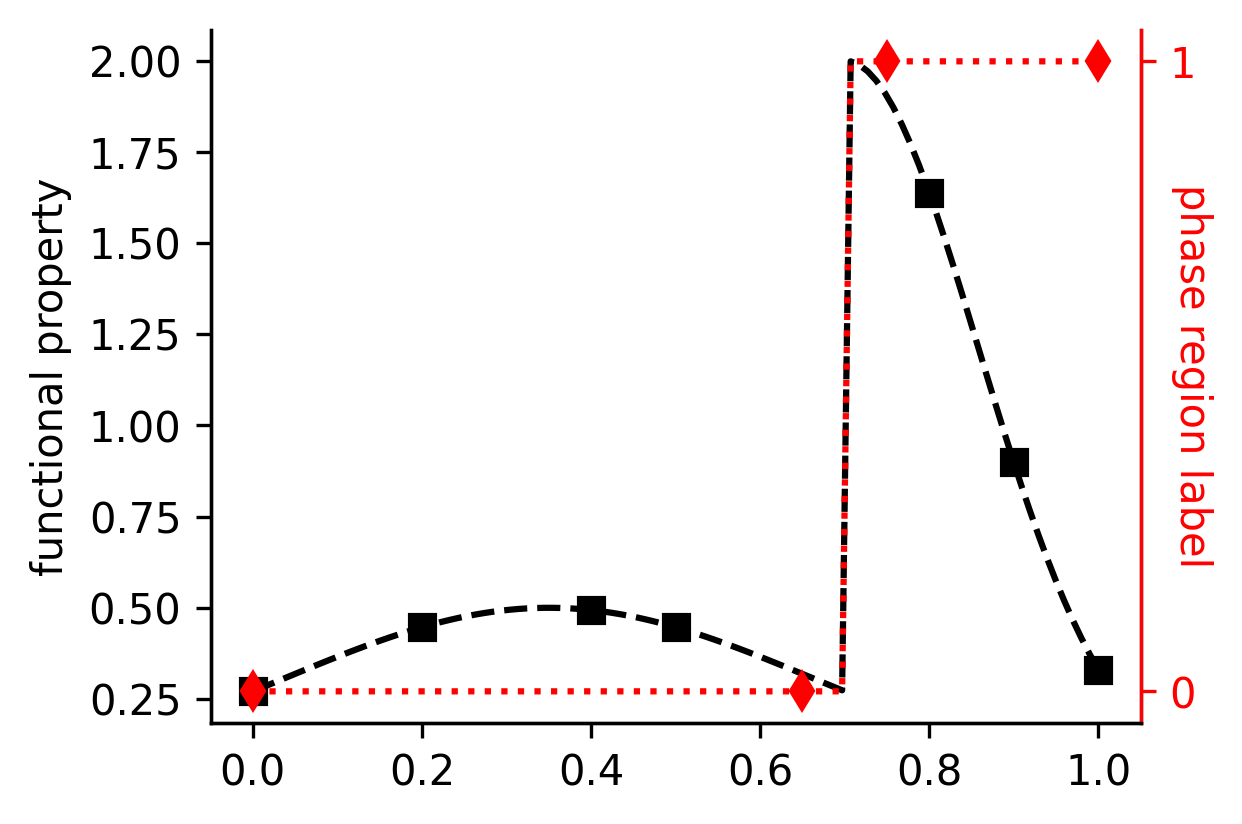

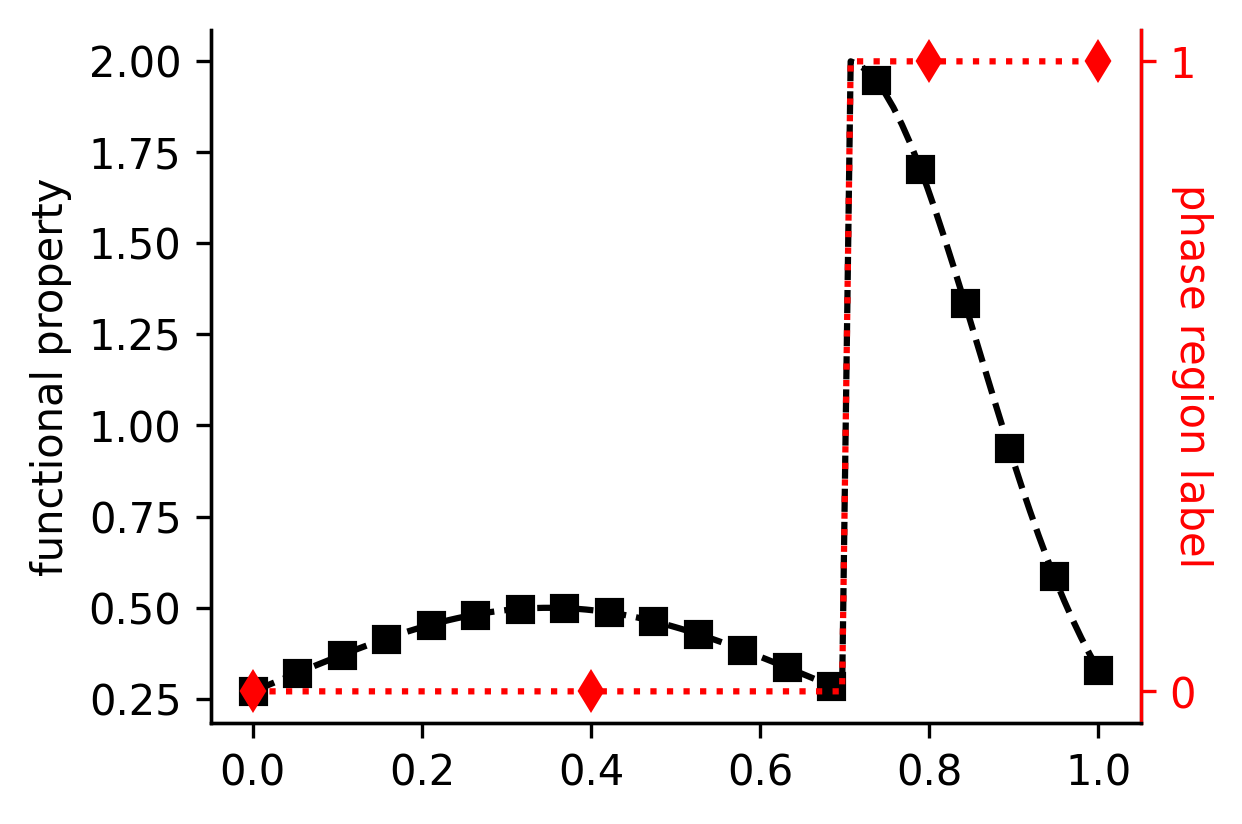

In [4]:
x = np.linspace(0,1,100)

y = simple_challenge_1D_2regions(x)
plt.figure()
plt.plot(x,y,'k.')

# Actual X values
xx = np.linspace(0,1,100)
xst1 = np.asarray([0., 0.65, 0.75, 1.])[:,None]
xfp1 = np.asarray([0.,.2, .4, .5, .8, .9, 1.])[:,None]

xst2 = np.asarray([0., .4, .8, 1.])[:,None]
xfp2 = np.linspace(0,1,20)[:,None]

yyst = xx > 0.7
yst1 = xst1 > 0.7
yfp1 = simple_challenge_1D_2regions(xfp1)
yst2 = xst2 > 0.7
yfp2 = simple_challenge_1D_2regions(xfp2)

plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
plt.plot(x, y, 'k--')
plt.plot(xfp1, yfp1, 'ks')
plt.plot(xst1, simple_challenge_1D_2regions(xst1), 'rd')
plt.subplot(1,2,2)
plt.plot(x, y, 'k--')
plt.plot(xfp2, yfp2, 'ks')
plt.plot(xst2, simple_challenge_1D_2regions(xst2), 'rd')

fig = plt.figure(figsize = (4,3), dpi=300)
ax11 = fig.add_subplot()
ax11.plot(x, y, 'k--')
plt.plot(xfp1, yfp1, 'ks')
ax11.spines['top'].set_visible(False)
ax11.set_ylabel('functional property')
ax12 = ax11.twinx()
ax12.plot(xx, yyst, 'r:')
ax12.plot(xst1, yst1, 'rd')
ax12.set_yticks([0,1])
ax12.spines['right'].set_color('red')
ax12.tick_params(axis='y', colors='red')
ax12.spines['top'].set_visible(False)
ax12.set_ylabel('phase region label', rotation = 270, color = 'red')

fig = plt.figure(figsize = (4,3), dpi=300)
ax21 = fig.add_subplot()
ax21.plot(x, y, 'k--')
plt.plot(xfp2, yfp2, 'ks')
ax21.spines['top'].set_visible(False)
ax21.set_ylabel('functional property')
ax22 = ax21.twinx()
ax22.plot(xx, yyst, 'r:')
ax22.plot(xst2, yst2, 'rd')
ax22.set_yticks([0,1])
ax22.spines['right'].set_color('red')
ax22.tick_params(axis='y', colors='red')
ax22.spines['top'].set_visible(False)
ax22.set_ylabel('phase region label', rotation = 270, color = 'red')

data_1d_challenges = [xst1, yst1, xfp1, yfp1,
                      xst2, yst2, xfp2, yfp2]
with open(r"data_1D_challenges.dill", "wb") as output_file:
    dill.dump(data_1d_challenges, output_file)

data_1d_challenges_full = [xx[:,None], yyst[:,None], simple_challenge_1D_2regions(xx[:,None])]
with open(r"data_1D_challenges_full.dill", "wb") as output_file:
    dill.dump(data_1d_challenges_full, output_file)

#### Run algorithms

In [3]:
with open(r"data_1D_challenges.dill", "rb") as input_file:
    [xst1, yst1, xfp1, yfp1,
    xst2, yst2, xfp2, yfp2] = dill.load(input_file)

Xpred = np.linspace(0,1,100)[:,None]
sage_1d = SAGE_1D(
    num_phase_regions=2,
    num_samples=100,
    num_warmup=10,
    target_accept_prob = 0.8,
    max_tree_depth = 5,
    jitter = 1E-6,
    locations_structure = xst1,
    locations_functional_property = xfp1,
    locations_prediction = Xpred,
    target_structure_labels = yst1,
    target_functional_properties = yfp1,
    gpr_variance_bounds = np.asarray([.01, 2.]),
    gpr_lengthscale_bounds = np.asarray([.2,1.]),
    gpr_noise_bounds= np.asarray([0.001,.01]),
    change_point_bounds = np.asarray([0.5, 1.]),
    gpr_bias_bounds = np.asarray([-2., 2.]),
    )

sage_1d.run()
predictions_1d_1 = sage_1d.predictions

100%|██████████| 100/100 [00:00<00:00, 451.15it/s]


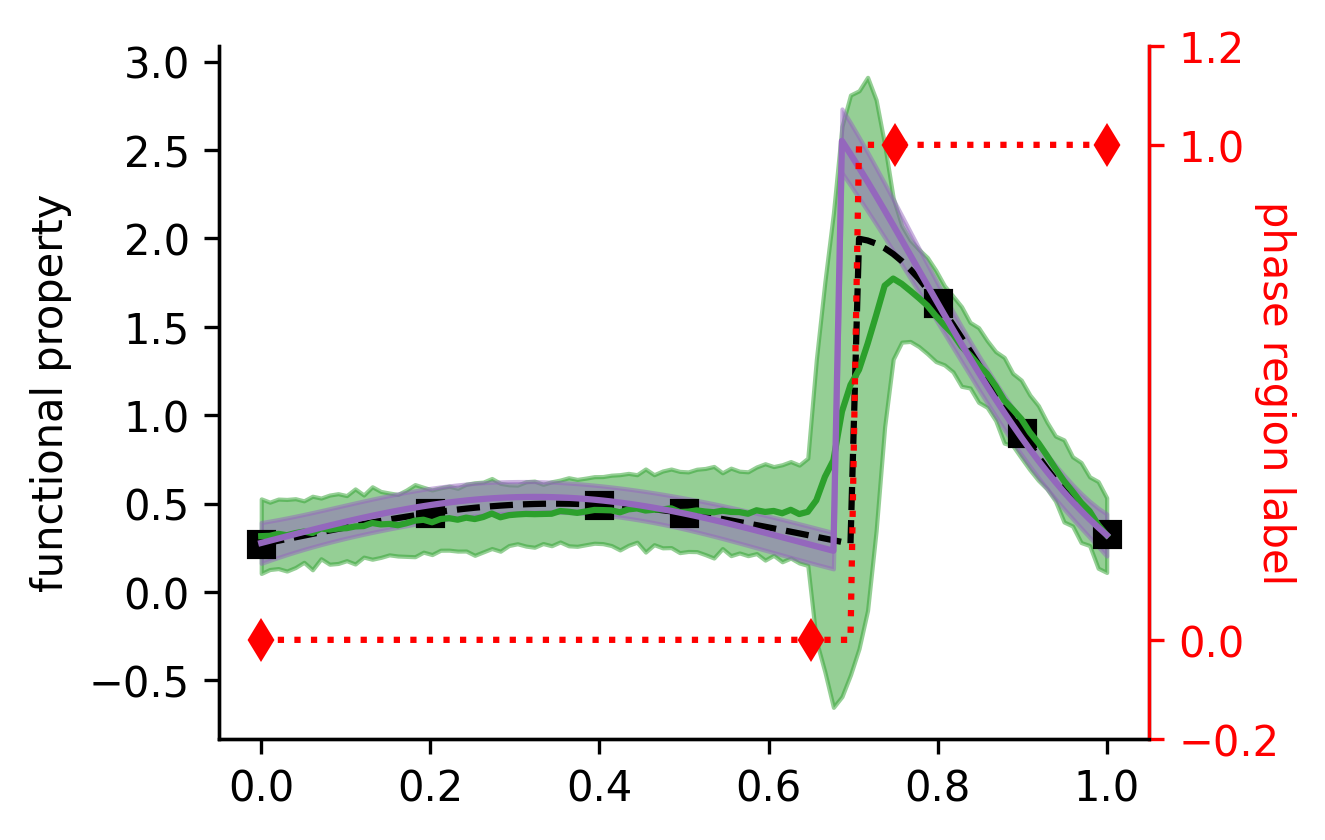

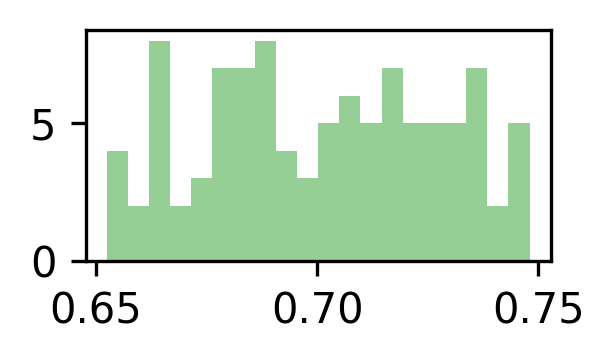

In [10]:
with open(r"data_1D_challenges_full.dill", "rb") as input_file:
    [xfull, ysfull, yffull] = dill.load(input_file)
    
# phase_region_labels_mean
# phase_region_labels_std
# change_point_mean
# change_point_std
# max_likelihood_change_points
gpr_mean = predictions_1d_1['functional_property_mean']
gpr_std = predictions_1d_1['functional_property_std']
cp_samples = predictions_1d_1['change_point_samples']
mllk_gpr_mean = predictions_1d_1['max_likelihood_functional_property_noiseless_mean']
mllk_gpr_var = predictions_1d_1['max_likelihood_functional_property_noiseless_var']

fig = plt.figure(figsize = (4,3), dpi=300)

ax11 = fig.add_subplot()
ax11.plot(xfull, yffull, 'k--')
ax11.plot(xfp1, yfp1, 'ks')
ax11.spines['top'].set_visible(False)
ax11.set_ylabel('functional property')
ax12 = ax11.twinx()
ax12.plot(xfull, ysfull, 'r:')
ax12.plot(xst1, yst1, 'rd')
ax12.set_yticks([-0.2,0,1,1.2])
ax12.spines['right'].set_color('red')
ax12.tick_params(axis='y', colors='red')
ax12.spines['top'].set_visible(False)
ax12.set_ylabel('phase region label', rotation = 270, color = 'red')    

# plot gpr from joint model 
ax11.plot(Xpred, gpr_mean, 'tab:green');
ax11.fill_between(Xpred.flatten(), gpr_mean.flatten() - 1.96*gpr_std.flatten(),
                 gpr_mean.flatten() + 1.96*gpr_std.flatten(), alpha=0.5, color = 'tab:green')

# MAX LLK
ax11.plot(Xpred, mllk_gpr_mean, 'tab:purple');
ax11.fill_between(Xpred.flatten(), mllk_gpr_mean.flatten() - 1.96*np.sqrt(mllk_gpr_var.flatten()),
                 mllk_gpr_mean.flatten() + 1.96*np.sqrt(mllk_gpr_var.flatten()), alpha=0.5, color = 'tab:purple')

# first case: plot changepoint distribution from structure model and joint model
fig = plt.figure(figsize = (2,1), dpi = 300)
plt.hist(cp_samples,bins=20, color = 'tab:green', alpha = 0.5);

In [9]:
import dill
import sklearn
import scipy
import tensorflow as tf
import gpflow
f64 = gpflow.utilities.to_default_float
from gpflow.ci_utils import ci_niter
from sklearn.metrics import r2_score, accuracy_score


with open(r"1D_results_231031b.dill", "rb") as input_file:
    data = dill.load(input_file)

Xpred, x, y_fp, y_st = data['starting']
xst1, yst1, xfp1, yfp1 = data['challenge_data'][0]
xst2, yst2, xfp2, yfp2 = data['challenge_data'][1]

xfp1_right = np.min(xfp1[xfp1 > .7])
xfp1_left = np.max(xfp1[xfp1 < .7])

print(xfp1_left, xfp1_right)

idx_kp = np.where(np.logical_or(Xpred < xfp1_left, Xpred > xfp1_right))[0]

sage_1D_PM_est_ch1 = Xpred > data['SAGE_1D_PM'][0]['cp_samples'].mean()
sage_1D_PM_est_ch2 = Xpred > data['SAGE_1D_PM'][1]['cp_samples'].mean()

sage_1D_FP_est_ch1 = Xpred > data['SAGE_1D_FP'][0]['cp_samples'].mean()
sage_1D_FP_est_ch2 = Xpred > data['SAGE_1D_FP'][1]['cp_samples'].mean()

sage_1D_joint_PM_est_ch1 = Xpred > data['SAGE_1D'][0]['cp_samples'].mean()
sage_1D_joint_PM_est_ch2 = Xpred > data['SAGE_1D'][1]['cp_samples'].mean()

gpr_cp_PM_est_ch1 = Xpred > data['gpr'][0]['cp']
gpr_cp_PM_est_ch2 = Xpred > data['gpr'][1]['cp']

# just PM EC1
C = 2
data_gpr = (tf.convert_to_tensor(xst1), tf.convert_to_tensor(yst1)) # create data variable that contains both the xy-coordinates of the currently measured samples and their labels.
kernel = gpflow.kernels.Matern52() #+ gpflow.kernels.White(variance=0.01)   # sum kernel: Matern32 + White
# Robustmax Multiclass Likelihood
invlink = gpflow.likelihoods.RobustMax(C)  # Robustmax inverse link function
likelihood = gpflow.likelihoods.MultiClass(C, invlink=invlink)  # Multiclass likelihood
m = gpflow.models.VGP(data=data_gpr, kernel=kernel, likelihood=likelihood, num_latent_gps=C) # set up the GP model

opt = gpflow.optimizers.Scipy() # set up the hyperparameter optimization
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, method = 'tnc', options=dict(maxiter=ci_niter(1000)) ) # run the optimization
y = m.predict_y(tf.convert_to_tensor(Xpred)) # what is the Poisson process for the full XY coordinates
y_mean = y[0].numpy() # mean of y
y_var = y[1].numpy() # variance of y.
gpc_est_pm_ch1 = np.argmax(y_mean,axis=1)

# just PM EC2
C = 2
data_gpr = (tf.convert_to_tensor(xst2), tf.convert_to_tensor(yst2)) # create data variable that contains both the xy-coordinates of the currently measured samples and their labels.
kernel = gpflow.kernels.Matern52() #+ gpflow.kernels.White(variance=0.01)   # sum kernel: Matern32 + White
# Robustmax Multiclass Likelihood
invlink = gpflow.likelihoods.RobustMax(C)  # Robustmax inverse link function
likelihood = gpflow.likelihoods.MultiClass(C, invlink=invlink)  # Multiclass likelihood
m = gpflow.models.VGP(data=data_gpr, kernel=kernel, likelihood=likelihood, num_latent_gps=C) # set up the GP model

opt = gpflow.optimizers.Scipy() # set up the hyperparameter optimization
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, method = 'tnc', options=dict(maxiter=ci_niter(1000)) ) # run the optimization
y = m.predict_y(tf.convert_to_tensor(Xpred)) # what is the Poisson process for the full XY coordinates
y_mean = y[0].numpy() # mean of y
y_var = y[1].numpy() # variance of y.
gpc_est_pm_ch2 = np.argmax(y_mean,axis=1)

r2_ch1_sage_joint = r2_score(y_fp[idx_kp],data['SAGE_1D'][0]['gpr_mean'][idx_kp])
r2_ch1_sage_fp = r2_score(y_fp[idx_kp],data['SAGE_1D_FP'][0]['gpr_mean'][idx_kp])
r2_ch1_gpr_cp = r2_score(y_fp[idx_kp],data['gpr'][0]['gpr_mean'][idx_kp])

r2_ch2_sage_joint = r2_score(y_fp[idx_kp],data['SAGE_1D'][1]['gpr_mean'][idx_kp])
r2_ch2_sage_fp = r2_score(y_fp[idx_kp],data['SAGE_1D_FP'][1]['gpr_mean'][idx_kp])
r2_ch2_gpr_cp = r2_score(y_fp[idx_kp],data['gpr'][1]['gpr_mean'][idx_kp])

acc_ch1_sage_joint = accuracy_score(y_st, sage_1D_joint_PM_est_ch1)
acc_ch1_sage_st = accuracy_score(y_st, sage_1D_PM_est_ch1)
acc_ch1_sage_fp = accuracy_score(y_st, sage_1D_FP_est_ch1)
acc_ch1_gpr_cp = accuracy_score(y_st, gpr_cp_PM_est_ch1)
acc_ch1_gpc = accuracy_score(y_st, gpc_est_pm_ch1)

acc_ch2_sage_joint = accuracy_score(y_st, sage_1D_joint_PM_est_ch2)
acc_ch2_sage_st = accuracy_score(y_st, sage_1D_PM_est_ch2)
acc_ch2_sage_fp = accuracy_score(y_st, sage_1D_FP_est_ch2)
acc_ch2_gpr_cp = accuracy_score(y_st, gpc_est_pm_ch2)
acc_ch2_gpc = accuracy_score(y_st, gpc_est_pm_ch2)

print('1D R2, SAGE:',r2_ch1_sage_joint, ' SAGE-FP:', r2_ch1_sage_fp, ' GPR_CP:', r2_ch1_gpr_cp)
print('1D Acc, SAGE:',acc_ch1_sage_joint, 'SAGE-PM:',acc_ch1_sage_st, 'SAGE-FP:',acc_ch1_sage_fp, 'GPR-CP:', acc_ch1_gpr_cp, ' GPC:',acc_ch1_gpc)
print('1D R2, SAGE:',r2_ch2_sage_joint, ' SAGE-FP:', r2_ch2_sage_fp, ' GPR_CP:', r2_ch2_gpr_cp)
print('1D Acc, SAGE:',acc_ch2_sage_joint, 'SAGE-PM:',acc_ch2_sage_st, 'SAGE-FP:',acc_ch2_sage_fp, 'GPR-CP:', acc_ch2_gpr_cp, ' GPC:',acc_ch2_gpc)

# plt.figure()
# plt.plot(Xpred, gpr_cp_mean1)
# plt.plot(Xpred, y_fp, 'r')
# plt.plot(Xpred, max_llk_sample_mean1)
# plt.plot(xfp1, yfp1, 'k.')

0.5 0.8
1D R2, SAGE: 0.9233980255071063  SAGE-FP: 0.9276781961572668  GPR_CP: 0.9581464353768367
1D Acc, SAGE: 0.96 SAGE-PM: 1.0 SAGE-FP: 0.72 GPR-CP: 0.89  GPC: 1.0
1D R2, SAGE: 0.993382598029019  SAGE-FP: 0.9975567562866738  GPR_CP: 0.983715687838814
1D Acc, SAGE: 0.98 SAGE-PM: 0.91 SAGE-FP: 0.99 GPR-CP: 0.9  GPC: 0.9


## N-dimensional Cases

### 2D Challenges

In [3]:
%%writefile sage_2D_2an_matern52_with_1init_230804a.py
# Unified for init 2a
from sage_2D_functions_230804a import predict_SAGE_ND_PM_230628a, predict_SAGE_ND_230628a, model_SAGE_ND_230628a
from sage_2D_functions_230804a import gen_data_2D_example, model_SAGE_ND_FP_230628a, model_SAGE_ND_PM_230628a

import matplotlib.pyplot as plt

import numpyro
import numpy as np
from numpy.random import default_rng

import torch
from torch.distributions import constraints
import scipy.io as sio

import jax
import jax.numpy as jnp
from jax import config
config.update("jax_enable_x64", True)
from jax.lax import dynamic_slice
from jax.nn import one_hot as jax_one_hot

from numpyro.infer import MCMC as nMCMC
from numpyro.infer import NUTS as nNUTS
from numpyro.infer import SVI as nSVI
from numpyro.infer import Predictive as nPredictive
from numpyro.infer import Trace_ELBO as nTrace_ELBO
import numpyro.distributions as ndist

torch.set_default_dtype(torch.float64)
from tqdm import trange
import dill
from tqdm import tqdm, trange
from torch.multiprocessing import Pool, Manager, Process
import functools
import math
import time
from numpyro import handlers
from numpyro.infer.initialization import init_to_value

numpyro.set_host_device_count(200)

if __name__ == '__main__':
    num_proc = 100

    
    N = 41
    xp_,yp_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
    xp = torch.round(xp_.flatten(),decimals=2)
    yp = torch.round(yp_.flatten(),decimals=2)
    Xp = torch.hstack((xp[:,None],yp[:,None])).double()
    Lp, _ = gen_data_2D_example(xp,yp)

    r = torch.sqrt(Xp[:,0]**2 + Xp[:,1]**2)

    with open(r"2D_2a_and_2b_fp_231030a.dill", "rb") as input_file:
        f = dill.load(input_file)


    num_data_points_st = 20
    num_data_points_fp = 60

    seed = 0
    top = torch.tensor([912,914, 994,996, 1078,1080, 1162,1164, 1244,1246, 1248,1166, 1250,1168, 1252,1170, 1254,1172, 1256,1174, 1176,1092,
                        1160, 1076, 1094, 1096, 1012,1014, 930,932, 848,850])
    bottom = torch.tensor([504, 520, 584, 604, 620, 766,768, 684,686, 600,602, 516,518, 436, 434, 514,432, 512,430, 510,428, 508,426, 424, 506, 586,588, 666,668, 748,750, 830,832])
    extra = torch.tensor( default_rng(seed).choice(Xp.shape[0],num_data_points_st,replace=False) )

    def map_indices(Xp, idx):  
        for i in range(idx.shape[0]):
            if (10*Xp[idx[i],0] % 2):
                idx[i] += 1
            if (10*Xp[idx[i],1] % 2):
                idx[i] = idx[i] + 41
        return idx

    extra = map_indices(Xp, extra)
    kp_st = torch.unique(torch.cat([extra, top, bottom, torch.tensor([902, 1680, 10])]))

    kp_fp = torch.tensor( default_rng(seed+1).permutation(Xp.shape[0])[:num_data_points_fp] )
    kp_fp = map_indices(Xp, kp_fp)
    temp = torch.sqrt(Xp[kp_fp,0]**2 + Xp[kp_fp,1]**2)
    kp_fp = kp_fp[torch.logical_or( temp > 1.5, temp < 1.)]

    xs = Xp[kp_st,:].double()
    ys = Lp[kp_st].double()
    xf = Xp[kp_fp,:].double()
    yf = f[kp_fp,0][:,None].double()
    # yf += torch.normal(torch.zeros(yf.shape),.01)
    starting_data = [Xp, Lp, f, xs, ys, xf, yf]

    xs_2a = xs.clone()
    ys_2a = ys.clone()
    xf_2a = xf.clone()
    yf_2a = yf.clone()

    xs = jnp.asarray( xs_2a.detach().numpy(), dtype=jnp.float64).copy()
    ys = jnp.asarray( ys_2a.detach().numpy(), dtype=jnp.integer).copy()
    xf = jnp.asarray( xf_2a.detach().numpy(), dtype=jnp.float64).copy()
    yf = jnp.asarray( yf_2a.detach().numpy(), dtype=jnp.float64).copy()

    Ns = xs.shape[0] + xf.shape[0]

    Nn = 40
    xn_,yn_ = torch.meshgrid(torch.linspace(-2,2,Nn),torch.linspace(-2,2,Nn),indexing='xy')
    xn = torch.round(xn_.flatten(),decimals=2)
    yn = torch.round(yn_.flatten(),decimals=2)
    X40 = torch.hstack((xn[:,None],yn[:,None])).double()
    Xnew_ = jnp.asarray( X40.detach().numpy(), dtype=jnp.float64).copy()


    key = jax.random.PRNGKey(0)
    num_regions = 2

    def predict_structure(post_samples, model, *args, **kwargs):
        key = jax.random.PRNGKey(0)
        model = handlers.seed(handlers.condition(model, post_samples), key)
        model_trace = handlers.trace(model).get_trace(*args, **kwargs)
        return model_trace["gpc_new_probs"]["value"], model_trace["gpc_new_latent"]["value"]

    def predict_sage(post_samples, model, *args, **kwargs):
        key = jax.random.PRNGKey(0)
        model = handlers.seed(handlers.condition(model, post_samples), key)
        model_trace = handlers.trace(model).get_trace(*args, **kwargs)
        return model_trace["Fr_new"]["value"], model_trace["f_piecewise"]["value"], model_trace["f_sample"]["value"], model_trace["gpc_new_probs"]["value"], model_trace["v_piecewise"]["value"]

    predict_fn_structure = lambda samples: predict_structure(
            samples, predict_SAGE_ND_PM_230628a, Xnew=Xnew_, xs=xs, ys=ys, num_regions=num_regions
        )
    predict_fn_sage_1core = lambda samples: predict_sage(
            samples, predict_SAGE_ND_230628a, Xnew_, xs, ys, xf, yf, num_regions=num_regions
        )
    def subsample(samples, step):
        tamples = {}
        for k in samples.keys():
            tamples[k] = samples[k][::step]  
        return tamples  

    def split_samples(samples, num_proc, length):
        sample_list = []
        splits = np.array(length/num_proc).astype(int)
        s = {}
        for i in trange(splits):
            for k in samples.keys():
                s[k] = samples[k][(i*num_proc):((i+1)*num_proc)]  
            sample_list.append(s)
        return sample_list

    def get_samples_split(samples, num_proc, length, i):
        s = {}
        for k in samples.keys():
            s[k] = samples[k][(i*num_proc):((i+1)*num_proc)]  
        return s    
    
    
    # ------------------------
    
    data = [xs, ys, xf, num_regions, jnp.asarray([5.,10.], dtype=jnp.float64), 
             jnp.asarray([1.,2.], dtype=jnp.float64)]
        
    key = jax.random.PRNGKey(0)
    autoguide_mle = numpyro.infer.autoguide.AutoLowRankMultivariateNormal(model_SAGE_ND_PM_230628a)
    optimizer = numpyro.optim.Adam(step_size=0.05)

    svi = nSVI(model_SAGE_ND_230628a, autoguide_mle, optimizer, loss=nTrace_ELBO())
    svi_result = svi.run(key, 100000, *data)

    params = svi_result.params
    mle_2a_st = autoguide_mle.median(params)
    preds_st = predict_fn_structure(mle_2a_st)
    
    gpc_new_probs_, gpc_new_latent_ = predict_fn_structure(mle_2a_st)
    
    gpc_latent_ = jnp.vstack((mle_2a_st['gpc_latent_0'],mle_2a_st['gpc_latent_1']))

    preds_fp = None
    
    # !!!!!!!!!!!!!!!!!!!!!!!!

    # gpc_new_probs_st = predict_fn_st(mle_2a_st)
    init_params = {'gpc_latent_0': mle_2a_st['gpc_latent_0'], 'gpc_latent_1': mle_2a_st['gpc_latent_1'],
                   'gpc_var': mle_2a_st['gpc_var'],'gpc_lengthscale': mle_2a_st['gpc_lengthscale'],
                   'gpc_bias': mle_2a_st['gpc_bias']}
    init_strategy=init_to_value(values=init_params)
    
    tic = time.perf_counter()
    nuts = nMCMC(nNUTS(model_SAGE_ND_230628a, target_accept_prob=0.8, max_tree_depth=5, init_strategy=init_strategy),
                num_samples=2000, num_warmup=100, num_chains=100)
    nuts.run(key, xs, ys, xf, yf, num_regions, gpc_var_bounds = jnp.asarray([5.,10.], dtype=jnp.float64),
             gpc_ls_bounds = jnp.asarray([.1,2.], dtype=jnp.float64), gpr_var_bounds = jnp.asarray([.1, 2.], dtype=jnp.float64),
             gpr_ls_bounds = jnp.asarray([.1,2.], dtype=jnp.float64), gpr_noise_bounds = jnp.asarray([0.001,.1], dtype=jnp.float64))

    nuts_posterior_samples = nuts.get_samples()
    
    import dill
    with open(r"2D_2an_100chains_4E3samples_2init_231011a.dill", "wb") as output_file:
        dill.dump(nuts_posterior_samples, output_file)

    print('start', nuts_posterior_samples['gpr_noise'].shape[0])
    samples = subsample(nuts_posterior_samples, step = 10)
    print('after subsampling', samples['gpr_noise'].shape[0]) 

    num_length = samples['gpr_noise'].shape[0]
    
    print('splitting')
    sl = split_samples(samples, num_proc, num_length)
    print('done splitting')
    
    splits = np.array(num_length / num_proc).astype(int)
   
    predict_fn_sage = jax.pmap(
        lambda samples: predict_sage(
            samples, predict_SAGE_ND_230628a, Xnew=Xnew_, xs=xs, ys=ys, xf=xf, yf=yf, num_regions=num_regions
        ), axis_name = 0
    )

    print('starting pred analysis, for #', num_length)
    labels = ['Fr_new', 'f_piecewise', 'f_sample', 'gpc_new_probs', 'v_piecewise']

    for i in trange(splits):
        if i == 0:
            preds = predict_fn_sage(sl[i])
            preds_stacked = {labels[0]:preds[0].squeeze(), labels[1]:preds[1].squeeze(), labels[2]:preds[2].squeeze(), labels[3]:preds[3].squeeze(), labels[4]:preds[4].squeeze()}
        else:
            preds = predict_fn_sage(sl[i])
            for j in range(len(labels)):
                preds_stacked[labels[j]] = np.vstack((preds_stacked[labels[j]],preds[j].squeeze()))
    toc = time.perf_counter()
    print(f"Run in {toc - tic:0.4f} seconds")    
                
    print('done pred analysis')
    
    output = {'preds': preds_stacked, 'preds_st':preds_st, 'preds_fp':preds_fp, 'starting_data':starting_data}
    with open(r"2D_2an_matern52_N41_10ksamples_2init_231011a.dill", "wb") as output_file:
        dill.dump(output, output_file)

Overwriting sage_2D_2an_matern52_with_1init_230804a.py


##### Challenge 1: SAGE-ND, 1 core

In [23]:
data_2d_challenges = [xs_2a, ys_2a, xf_2a, yf_2a,
                      xs_2b, ys_2b, xf_2b, yf_2b,
                      Xs_, ys_, Xf_, yf_]
with open(r"G:\My Drive\Data\SAGE\2D_challenges_data.dill", "rb") as input_file:
    [xs_2a, ys_2a, xf_2a, yf_2a,
    xs_2b, ys_2b, xf_2b, yf_2b,
    Xs_, ys_, Xf_, yf_] = dill.load(input_file)

Nn = 40
xn_,yn_ = torch.meshgrid(torch.linspace(-2,2,Nn),torch.linspace(-2,2,Nn),indexing='xy')
xn = torch.round(xn_.flatten(),decimals=2)
yn = torch.round(yn_.flatten(),decimals=2)
X40 = torch.hstack((xn[:,None],yn[:,None])).double()
Xpred = X40.detach().numpy()

from hermes.joint import SAGE_ND
sage_nd = SAGE_ND(
    num_phase_regions=2,
    num_samples=100,
    num_warmup=10,
    num_chains = 1,
    target_accept_prob = 0.8,
    max_tree_depth = 5,
    jitter = 1E-6,
    phase_map_SVI_num_steps = 1000,
    Adam_step_size = 0.05,
    posterior_sampling = 1,
    locations_structure = xs_2a.detach().numpy(),
    locations_functional_property = xf_2a.detach().numpy(),
    target_structure_labels = ys_2a.detach().numpy(),
    target_functional_properties = yf_2a.detach().numpy(),
    locations_prediction = Xpred,
    gpc_variance_bounds = np.asarray([5.,10.]),
    gpc_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_variance_bounds = np.asarray([.1, 2.]),
    gpr_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_noise_bounds= np.asarray([0.001,.1]),
    gpr_bias_bounds = np.asarray([-2., 2.]),
    )

sage_nd.run()
predictions_2d_1 = sage_nd.predictions

100%|██████████| 100/100 [00:00<00:00, 644.49it/s]


starting pred analysis, for # 100


100%|██████████| 100/100 [00:19<00:00,  5.12it/s]

Run in 42.6258 seconds
done pred analysis


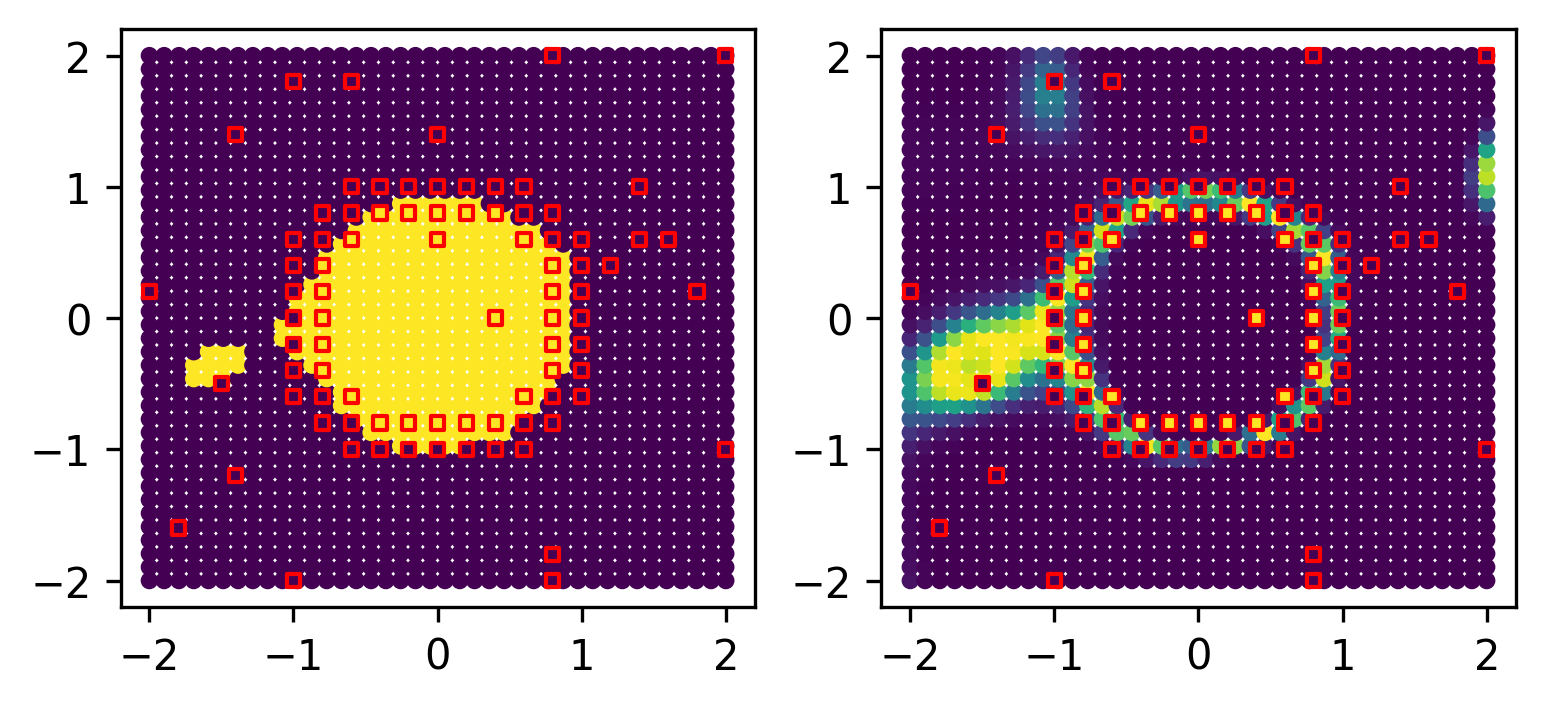

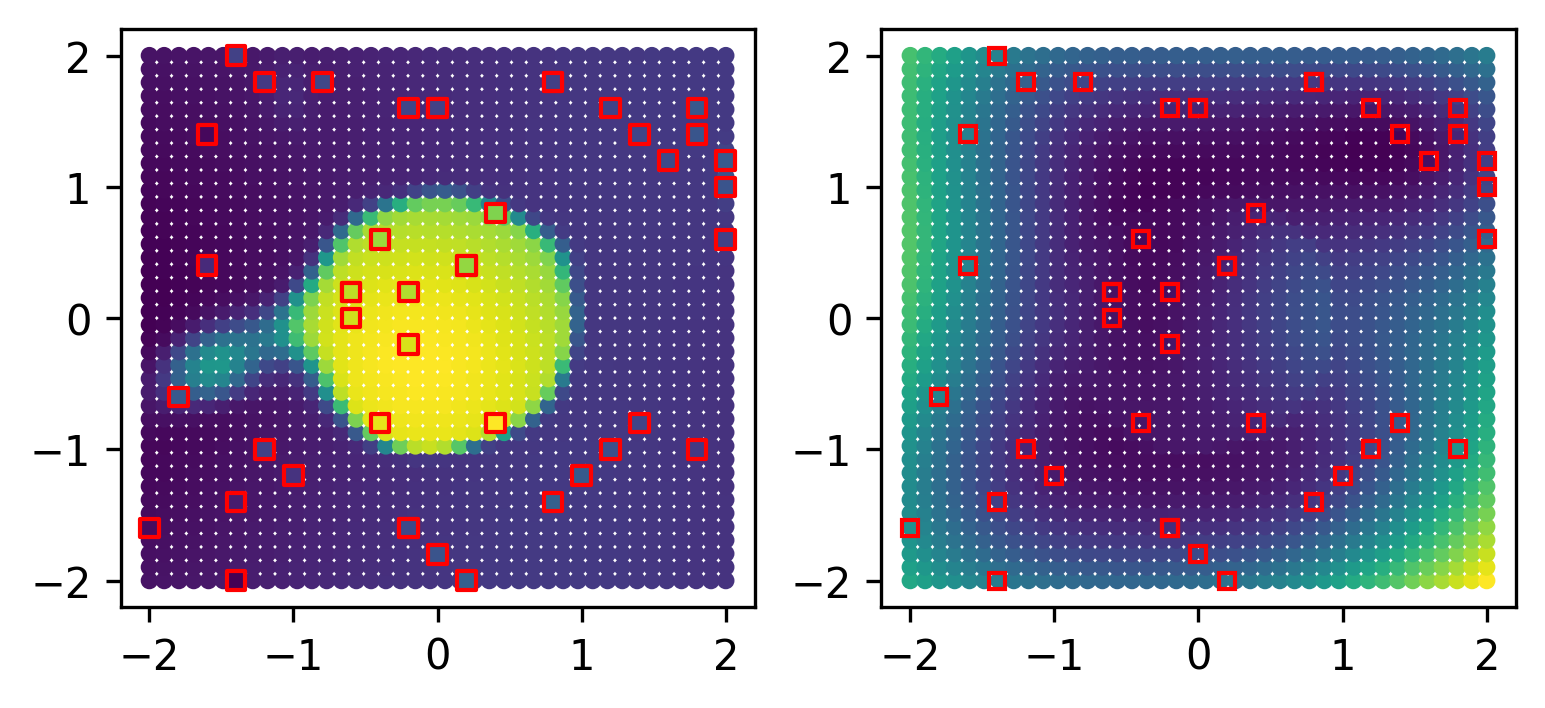

In [6]:
N = 40
x_,y_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
x = x_.flatten()
y = y_.flatten()

gpc_est = predictions_2d_1['phase_region_labels_mean_estimate']
gpc_ent = predictions_2d_1['phase_region_labels_mean_entropy']
gpr_mean = predictions_2d_1['functional_property_mean']
gpr_std = predictions_2d_1['functional_property_std']

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y,c=gpc_est,s=10)
plt.scatter(xs_2a[:,0],xs_2a[:,1],c=ys_2a,s=10,edgecolors='r',marker='s')
plt.subplot(1,2,2)
plt.scatter(x, y,c=gpc_ent,s=10)
plt.scatter(xs_2a[:,0],xs_2a[:,1],c=ys_2a,s=10,edgecolors='r',marker='s')

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y, c=gpr_mean, s=10)
plt.scatter(xf_2a[:,0],xf_2a[:,1],s=20,c=yf_2a,edgecolor='r',marker='s')
# plt.title('GPR mean')
plt.subplot(1,2,2)
plt.scatter(x, y, c=gpr_std, s=10)
plt.plot(xf_2a[:,0],xf_2a[:,1],'s',markerfacecolor="none",markeredgecolor='r',markersize=4)


##### Challenge 2: SAGE-ND, 1 core

In [5]:
with open(r"2D_challenges_data.dill", "rb") as input_file:
    [xs_2a, ys_2a, xf_2a, yf_2a,
    xs_2b, ys_2b, xf_2b, yf_2b,
    Xs_, ys_, Xf_, yf_] = dill.load(input_file)

Nn = 40
xn_,yn_ = torch.meshgrid(torch.linspace(-2,2,Nn),torch.linspace(-2,2,Nn),indexing='xy')
xn = torch.round(xn_.flatten(),decimals=2)
yn = torch.round(yn_.flatten(),decimals=2)
X40 = torch.hstack((xn[:,None],yn[:,None])).double()
Xpred = X40.detach().numpy()

from hermes.joint import SAGE_ND
sage_nd = SAGE_ND(
    num_phase_regions=2,
    num_samples=100,
    num_warmup=10,
    num_chains = 1,
    target_accept_prob = 0.8,
    max_tree_depth = 5,
    jitter = 1E-6,
    phase_map_SVI_num_steps = 1000,
    Adam_step_size = 0.05,
    posterior_sampling = 1,
    locations_structure = xs_2b.detach().numpy(),
    locations_functional_property = xf_2b.detach().numpy(),
    target_structure_labels = ys_2b.detach().numpy(),
    target_functional_properties = yf_2b.detach().numpy(),
    locations_prediction = Xpred,
    gpc_variance_bounds = np.asarray([5.,10.]),
    gpc_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_variance_bounds = np.asarray([.1, 2.]),
    gpr_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_noise_bounds= np.asarray([0.001,.1]),
    gpr_bias_bounds = np.asarray([-2., 2.]),
    )

sage_nd.run()
predictions_2d_1 = sage_nd.predictions

100%|██████████| 100/100 [00:00<00:00, 599.58it/s]


starting pred analysis, for # 100


100%|██████████| 100/100 [00:24<00:00,  4.02it/s]

Run in 51.4303 seconds
done pred analysis


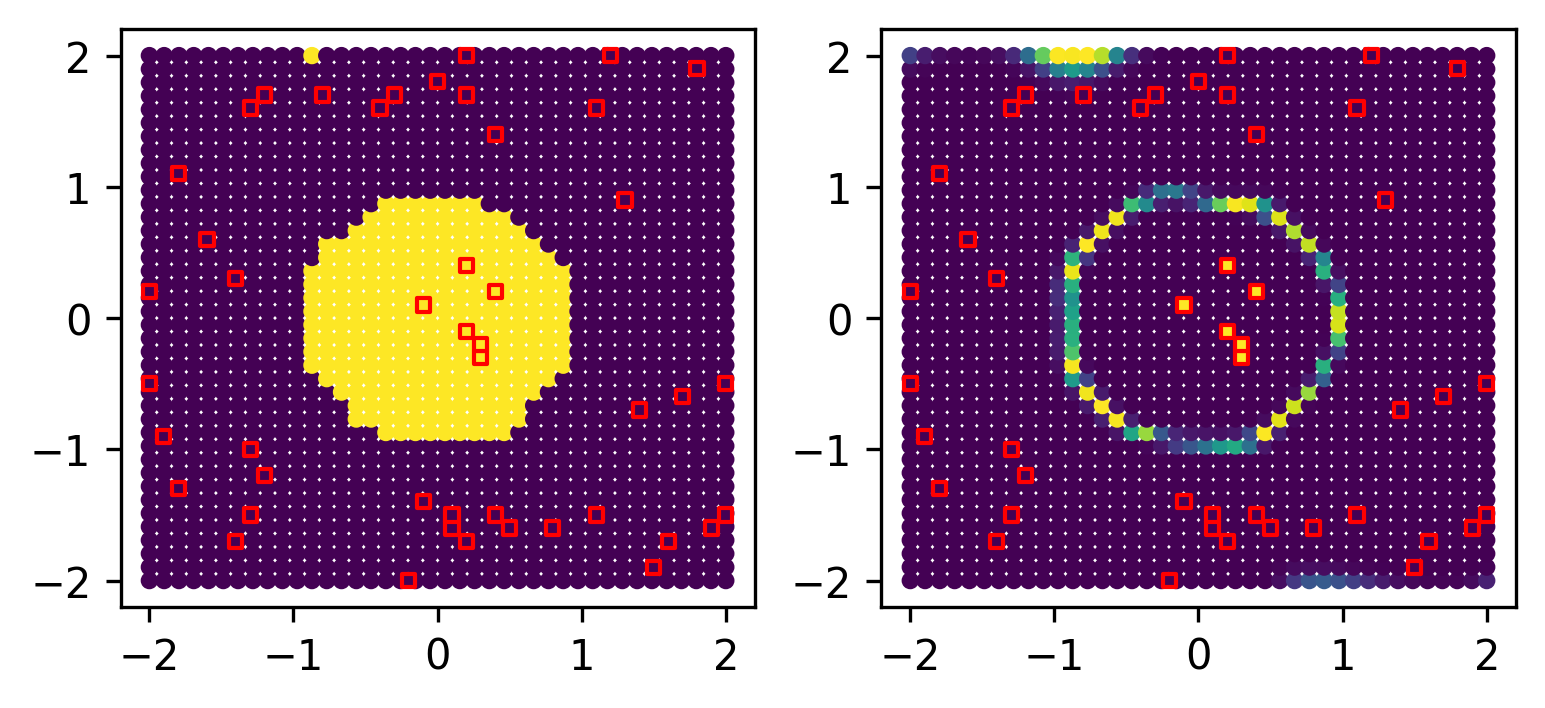

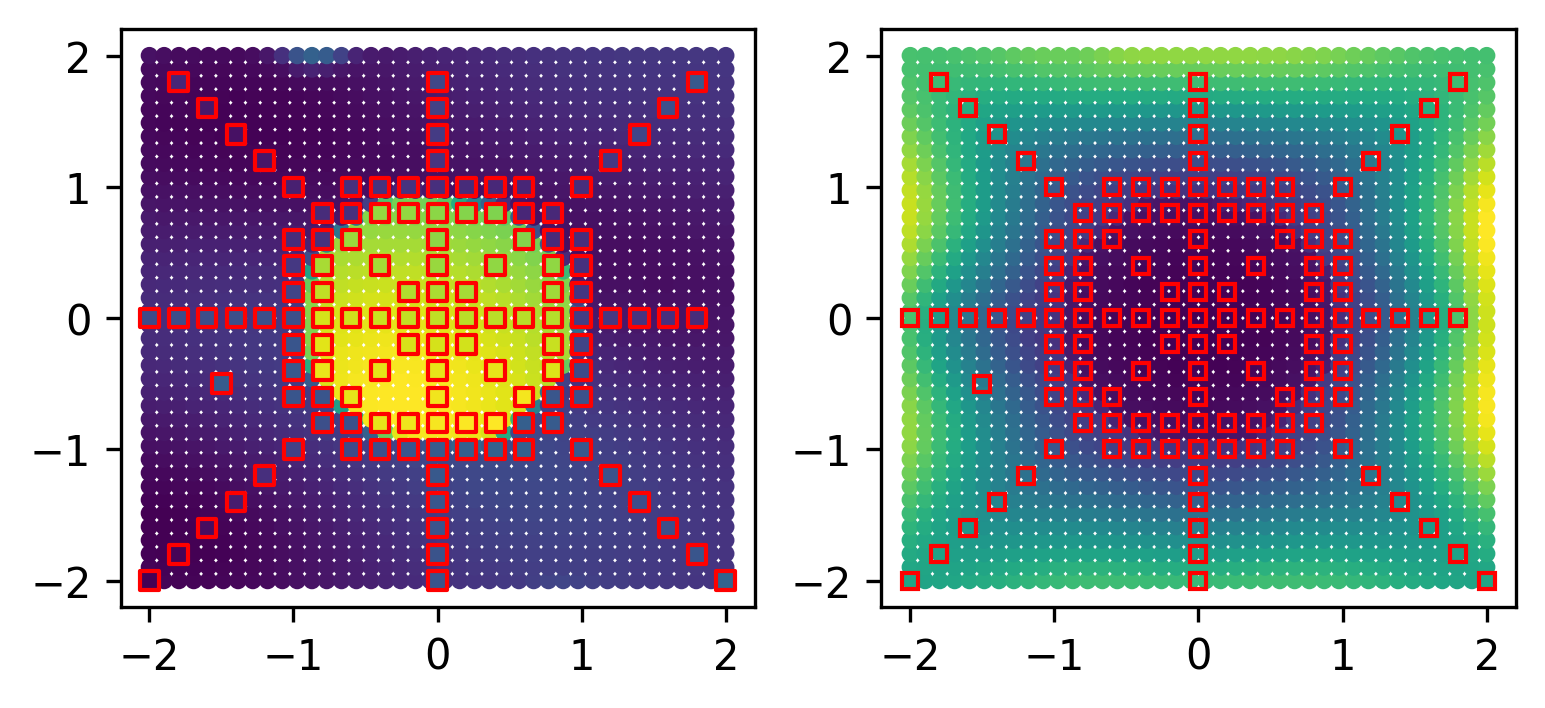

In [4]:
N = 40
x_,y_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
x = x_.flatten()
y = y_.flatten()

gpc_est = predictions_2d_1['phase_region_labels_mean_estimate']
gpc_ent = predictions_2d_1['phase_region_labels_mean_entropy']
gpr_mean = predictions_2d_1['functional_property_mean']
gpr_std = predictions_2d_1['functional_property_std']

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y,c=gpc_est,s=10)
plt.scatter(xs_2b[:,0],xs_2b[:,1],c=ys_2b,s=10,edgecolors='r',marker='s')
plt.subplot(1,2,2)
plt.scatter(x, y,c=gpc_ent,s=10)
plt.scatter(xs_2b[:,0],xs_2b[:,1],c=ys_2b,s=10,edgecolors='r',marker='s')

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y, c=gpr_mean, s=10)
plt.scatter(xf_2b[:,0],xf_2b[:,1],s=20,c=yf_2b,edgecolor='r',marker='s')
# plt.title('GPR mean')
plt.subplot(1,2,2)
plt.scatter(x, y, c=gpr_std, s=10)
plt.plot(xf_2b[:,0],xf_2b[:,1],'s',markerfacecolor="none",markeredgecolor='r',markersize=4)


##### Challenge 3: SAGE-ND Coreg, 1 core

In [4]:
N = 41
xp_,yp_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
xp = torch.round(xp_.flatten(),decimals=2)
yp = torch.round(yp_.flatten(),decimals=2)
Xp = torch.hstack((xp[:,None],yp[:,None])).double()
Lp, _ = gen_data_2D_example(xp,yp)

with open(r"2D_2a_and_2b_fp_231030a.dill", "rb") as input_file:
    f = dill.load(input_file)
    
starting_data = [Xp, Lp, f, Xs_, ys_, Xf_, yf_]

N = 41
x_,y_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
x = x_.flatten()
y = y_.flatten()
X40 = torch.hstack((x[:,None],y[:,None])).double()
Xpred = X40.detach().numpy()

from hermes.joint import SAGE_ND_Coreg
sage_nd_coreg = SAGE_ND_Coreg(
    num_phase_regions=2,
    num_samples=100,
    num_warmup=10,
    num_chains = 1,
    target_accept_prob = 0.8,
    max_tree_depth = 5,
    jitter = 1E-6,
    phase_map_SVI_num_steps = 1000,
    Adam_step_size = 0.01,
    posterior_sampling = 10,
    locations_structure = Xs_,
    locations_functional_property = Xf_,
    target_structure_labels = ys_,
    target_functional_properties = yf_,
    locations_prediction = Xpred,
    gpc_variance_bounds = np.asarray([5.,10.]),
    gpc_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_variance_bounds = np.asarray([.1, 2.]),
    gpr_lengthscale_bounds = np.asarray([.1,2.]),
    gpr_noise_bounds= np.asarray([0.001,.01]),
    gpr_bias_bounds = np.asarray([-2., 2.]),
    )

sage_nd_coreg.run()
predictions_2d_3 = sage_nd_coreg.predictions

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.71it/s]

Run in 101.8117 seconds


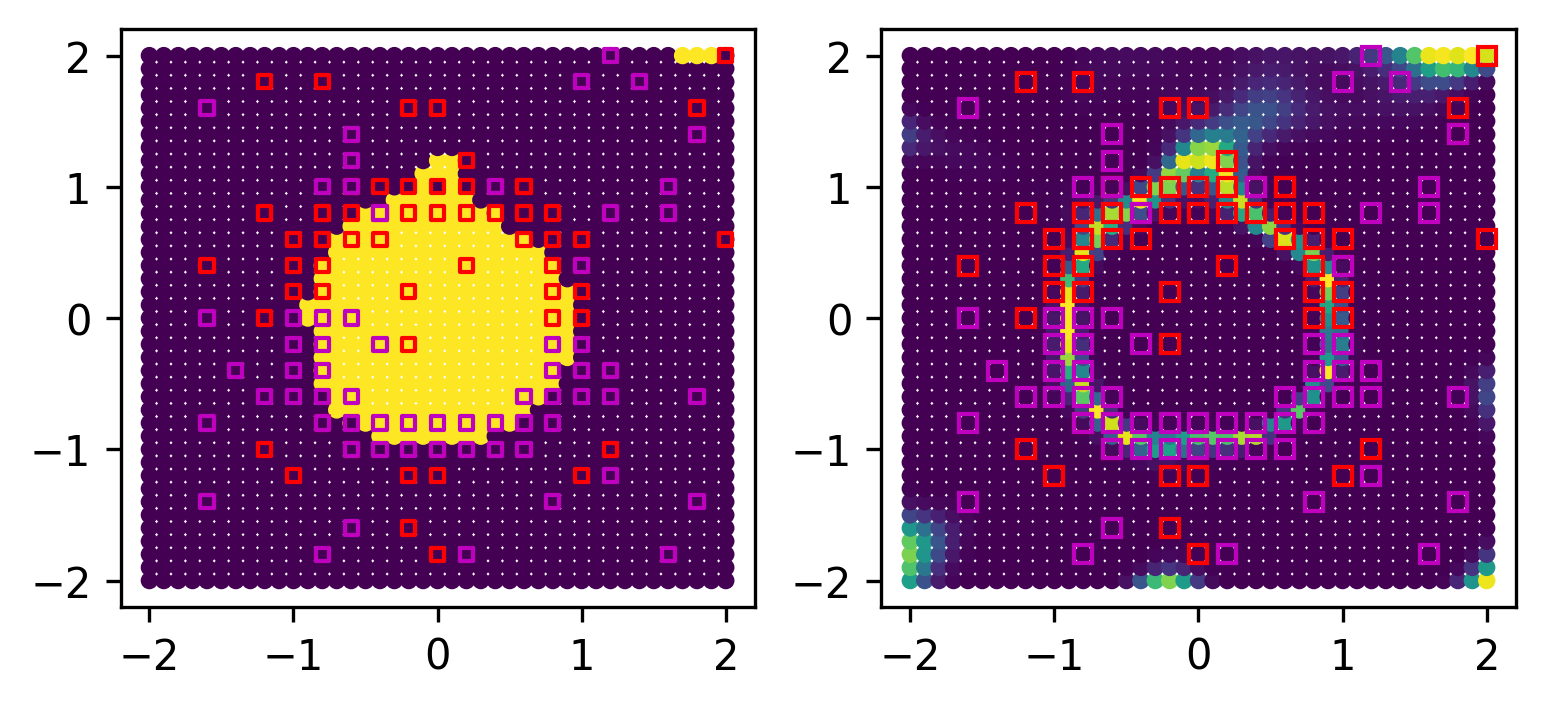

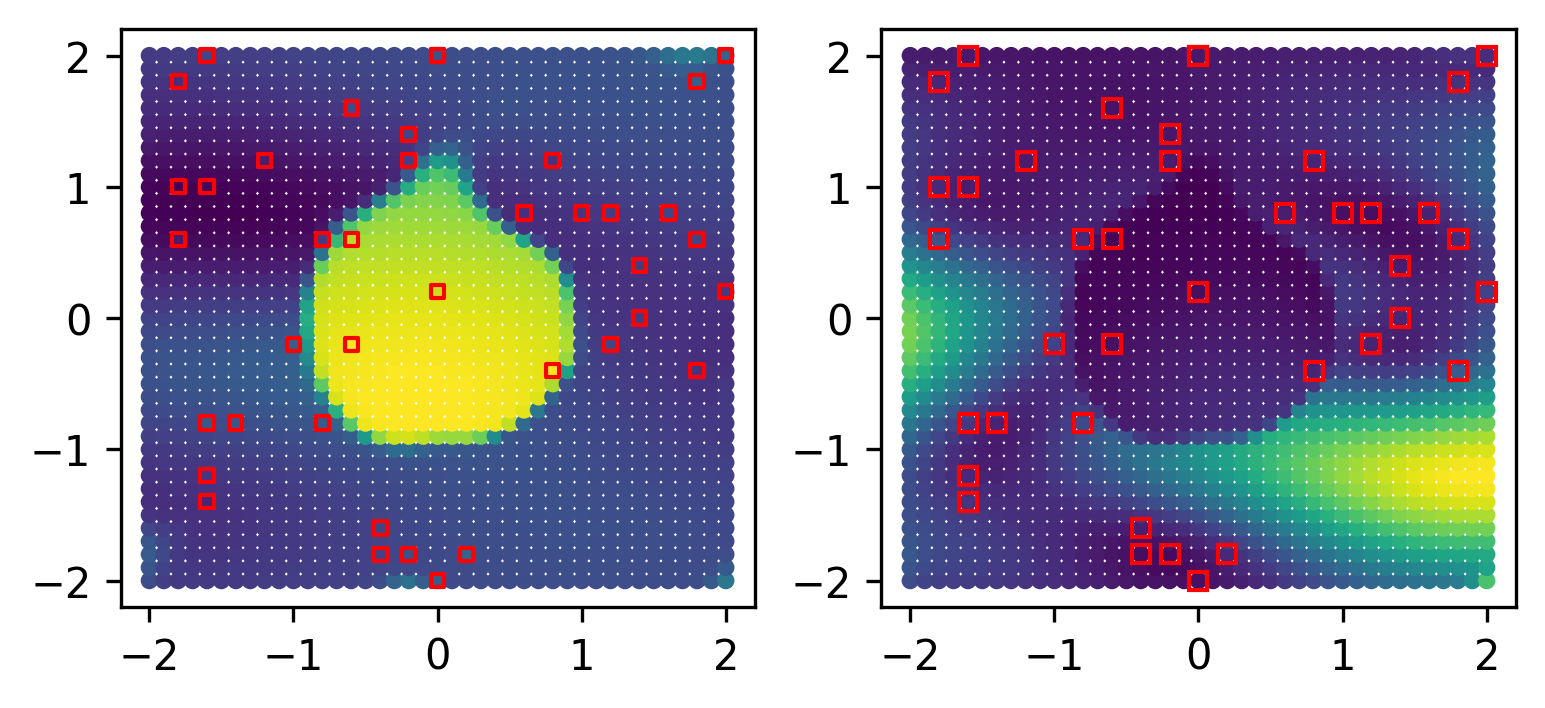

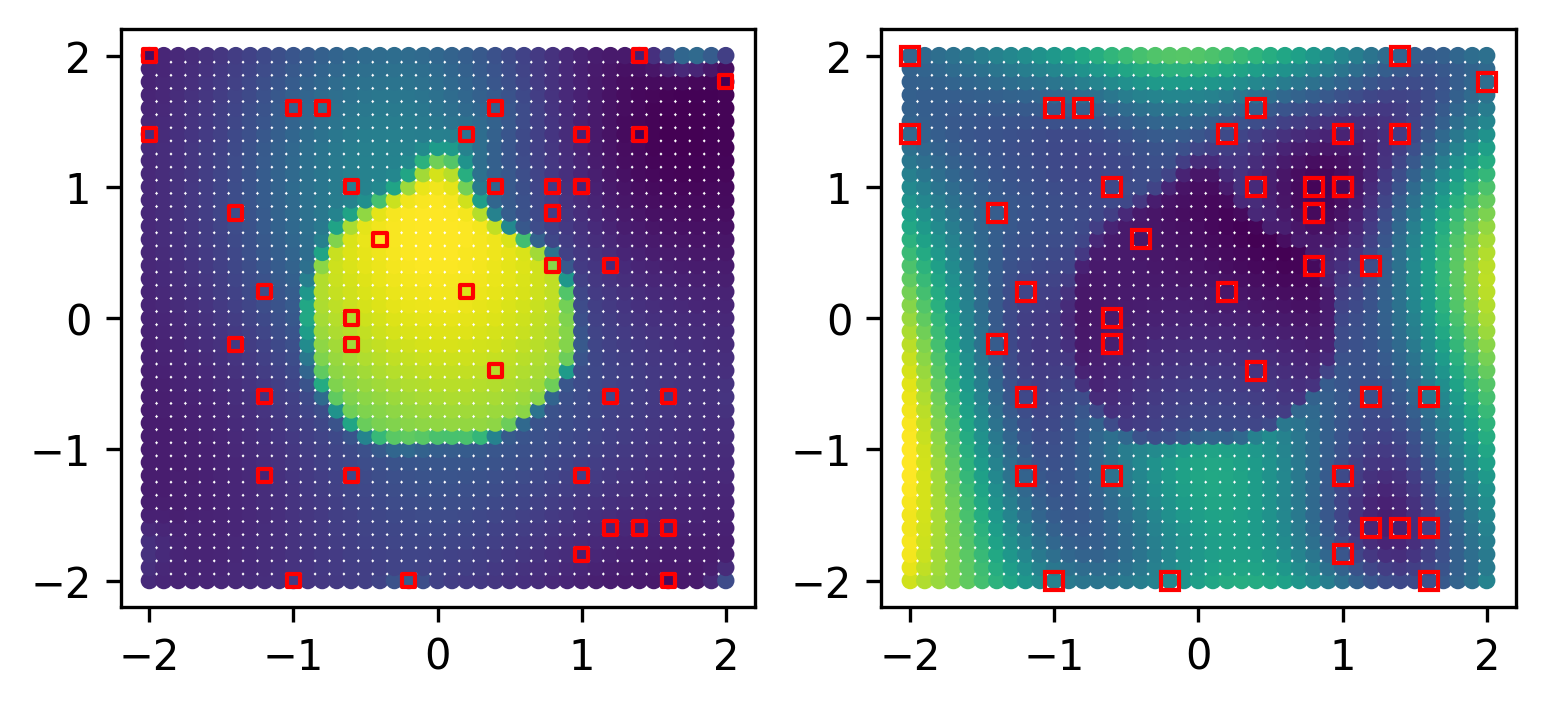

In [7]:
gpc_est = predictions_2d_3['phase_region_labels_mean_estimate']
gpc_ent = predictions_2d_3['phase_region_labels_mean_entropy']
gpr_mean = predictions_2d_3['functional_property_mean']
gpr_std = predictions_2d_3['functional_property_std']

Xp, Lp, f, Xsi_, ysi_, Xfi_, yfi_ = starting_data

labels = ['Fr_new', 'f_piecewise', 'f_sample', 'gpc_new_probs', 'v_piecewise']

N = 41
x_,y_ = torch.meshgrid(torch.linspace(-2,2,N),torch.linspace(-2,2,N),indexing='xy')
x = x_.flatten()
y = y_.flatten()

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y, c=gpc_est, s=10)
plt.scatter(Xsi_[0][:,0],Xsi_[0][:,1],c=ysi_[0],s=10,edgecolors='r',marker='s')
plt.scatter(Xsi_[1][:,0],Xsi_[1][:,1],c=ysi_[1],s=10,edgecolors='m',marker='s')
plt.subplot(1,2,2)
plt.scatter(x, y, c=gpc_ent, s=10)
plt.plot(Xsi_[0][:,0],Xsi_[0][:,1],'s',markerfacecolor="none",markeredgecolor='r',markersize=4.5)
plt.plot(Xsi_[1][:,0],Xsi_[1][:,1],'s',markerfacecolor="none",markeredgecolor='m',markersize=4.5)

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y, c=gpr_mean[:,0], s=10)
plt.scatter(Xfi_[0][:,0],Xfi_[0][:,1],s=10,c=yfi_[0],edgecolor='r',marker='s')
plt.subplot(1,2,2)
plt.scatter(x, y, c=gpr_std[:,0], s=10)
plt.plot(Xfi_[0][:,0],Xfi_[0][:,1],'s',markerfacecolor="none",markeredgecolor='r',markersize=4.5)

plt.figure(figsize = (6,2.5),dpi=300)
plt.subplot(1,2,1)
plt.scatter(x, y, c=gpr_mean[:,1], s=10)
plt.scatter(Xfi_[1][:,0],Xfi_[1][:,1],s=10,c=yfi_[1],edgecolor='r',marker='s')
plt.subplot(1,2,2)
plt.scatter(x, y, c=gpr_std[:,1], s=10)
plt.plot(Xfi_[1][:,0],Xfi_[1][:,1],'s',markerfacecolor="none",markeredgecolor='r',markersize=4.5)